<a href="https://colab.research.google.com/github/sachsac/Im-Going-to-Disney-World/blob/main/Project_2_Parts_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data supplied by Lynne Passanisi on [data.world](https://data.world/lynne588/walt-disney-world-ride-data). 

Dictionary as follows:

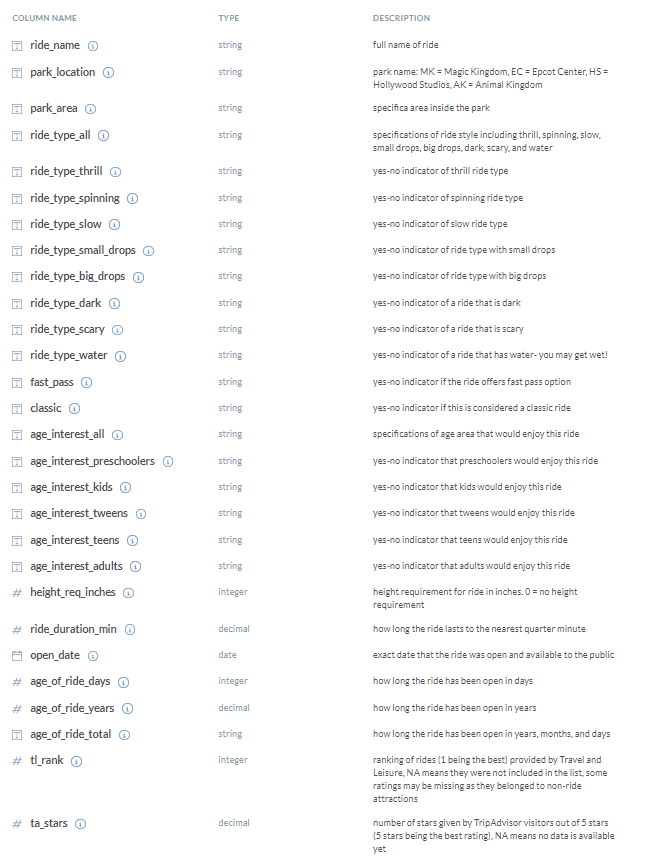


#Imports and upload data

In [1152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1153]:
df = pd.read_excel('/content/drive/MyDrive/Coding Dojo/WDW_Ride_Data_DW.xlsx')
df #entire df

,Ride_name,Park_location,Park_area,Ride_type_all,Ride_type_thrill,Ride_type_spinning,Ride_type_slow,Ride_type_small_drops,Ride_type_big_drops,Ride_type_dark,Ride_type_scary,Ride_type_water,Fast_pass,Classic,Age_interest_all,Age_interest_preschoolers,Age_interest_kids,Age_interest_tweens,Age_interest_teens,Age_interest_adults,Height_req_inches,Ride_duration_min,Open_date,Age_of_ride_days,Age_of_ride_years,Age_of_ride_total,TL_rank,TA_Stars
0,Alien Swirling Saucers,HS,Toy Story Land,spinning,No,Yes,No,No,No,No,No,No,Yes,No,all ages,Yes,Yes,Yes,Yes,Yes,32,1.50,2018-06-30,480,1.314168,1 years 3 months 24 days,31.0,NaN
1,Astro Orbiter,MK,Tomorrowland,"spinning, slow",No,Yes,Yes,No,No,No,No,No,No,Yes,all ages,Yes,Yes,Yes,Yes,Yes,0,1.50,1995-02-25,9006,24.657084,24 years 7 months 27 days,43.0,3.5
2,Avatar Flight of Passage,AK,Pandora,thrill,Yes,No,No,No,No,No,No,No,Yes,No,"kids, tweens, teens, adults",No,Yes,Yes,Yes,Yes,44,5.00,2017-05-27,879,2.406571,2 years 4 months 28 days,9.0,5.0
3,Big Thunder Mountain Railroad,MK,Frontierland,"thirll, small drops",Yes,No,No,Yes,No,No,No,No,Yes,Yes,"kids, tweens, teens, adults",No,Yes,Yes,Yes,Yes,40,3.50,1980-09-23,14274,39.080082,39 years 0 months 29 days,8.0,4.5
4,Buzz Lightyear's Space Ranger Spin,MK,Tomorrowland,"spinning, slow",No,Yes,Yes,No,No,No,No,No,Yes,No,all ages,Yes,Yes,Yes,Yes,Yes,0,4.00,1998-10-07,7686,21.043121,21 years 0 months 15 days,32.0,4.5
5,Dinosaur,AK,Dinoland USA,"thrill, small drops, dark, scary",Yes,No,No,Yes,No,Yes,Yes,No,Yes,No,"kids, tweens, teens, adults",No,Yes,Yes,Yes,Yes,40,3.25,1998-04-22,7854,21.503080,21 years 6 months 2 days,24.0,4.0
6,Dumbo the Flying Elephant,MK,Fantasyland,"spinning, slow",No,Yes,Yes,No,No,No,No,No,Yes,Yes,all ages,Yes,Yes,Yes,Yes,Yes,0,1.50,1971-10-01,17554,48.060233,48 years 0 months 22 days,29.0,4.5
7,Expedition Everest,AK,Asia,"thrill, big drops, dark",Yes,No,No,No,Yes,Yes,No,No,Yes,No,"kids, tweens, teens, adults",No,Yes,Yes,Yes,Yes,44,2.75,2006-04-07,4947,13.544148,13 years 6 months 17 days,1.0,5.0
8,Frozen Ever After,EC,World Showcase,"slow, small drops, dark",No,No,Yes,Yes,No,Yes,No,No,Yes,No,all ages,Yes,Yes,Yes,Yes,Yes,0,5.00,2016-06-21,1219,3.337440,3 years 4 months 3 days,27.0,4.0
9,Gran Fiesta Tour Starring The Three Caballeros,EC,World Showcase,slow,No,No,Yes,No,No,No,No,No,No,Yes,all ages,Yes,Yes,Yes,Yes,Yes,0,8.00,2007-04-02,4587,12.558522,12 years 6 months 22 days,47.0,4.0


In [1154]:
df.info() 
#TL Rank should be an int not float, to deal with later in data cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Ride_name                  46 non-null     object        
 1   Park_location              46 non-null     object        
 2   Park_area                  46 non-null     object        
 3   Ride_type_all              46 non-null     object        
 4   Ride_type_thrill           46 non-null     object        
 5   Ride_type_spinning         46 non-null     object        
 6   Ride_type_slow             46 non-null     object        
 7   Ride_type_small_drops      46 non-null     object        
 8   Ride_type_big_drops        46 non-null     object        
 9   Ride_type_dark             46 non-null     object        
 10  Ride_type_scary            46 non-null     object        
 11  Ride_type_water            46 non-null     object        
 12  Fast_pass 

#Data Cleaning

## Nulls

In [1155]:
df.isnull().sum()
#two nulls in the TL_rank and TA_stars, these mean they haven't been yet rated

Ride_name                    0
Park_location                0
Park_area                    0
Ride_type_all                0
Ride_type_thrill             0
Ride_type_spinning           0
Ride_type_slow               0
Ride_type_small_drops        0
Ride_type_big_drops          0
Ride_type_dark               0
Ride_type_scary              0
Ride_type_water              0
Fast_pass                    0
Classic                      0
Age_interest_all             0
Age_interest_preschoolers    0
Age_interest_kids            0
Age_interest_tweens          0
Age_interest_teens           0
Age_interest_adults          0
Height_req_inches            0
Ride_duration_min            0
Open_date                    0
Age_of_ride_days             0
Age_of_ride_years            0
Age_of_ride_total            0
TL_rank                      2
TA_Stars                     2
dtype: int64

In [1156]:
#the rides with nulls in TA_Stars
df[df['TA_Stars'].isna()]

,Ride_name,Park_location,Park_area,Ride_type_all,Ride_type_thrill,Ride_type_spinning,Ride_type_slow,Ride_type_small_drops,Ride_type_big_drops,Ride_type_dark,Ride_type_scary,Ride_type_water,Fast_pass,Classic,Age_interest_all,Age_interest_preschoolers,Age_interest_kids,Age_interest_tweens,Age_interest_teens,Age_interest_adults,Height_req_inches,Ride_duration_min,Open_date,Age_of_ride_days,Age_of_ride_years,Age_of_ride_total,TL_rank,TA_Stars
0,Alien Swirling Saucers,HS,Toy Story Land,spinning,No,Yes,No,No,No,No,No,No,Yes,No,all ages,Yes,Yes,Yes,Yes,Yes,32,1.5,2018-06-30,480,1.314168,1 years 3 months 24 days,31.0,NaN
27,Slinky Dog Dash,HS,Toy Story Land,"thrill, small drops",Yes,No,No,Yes,No,No,No,No,Yes,No,"kids, tweens, teens, adults",No,Yes,Yes,Yes,Yes,38,2.0,2018-06-30,480,1.314168,1 years 3 months 24 days,14.0,NaN


Easiest thing to do is search on Travel Advisors and see if the rides,since 2018, are rated on the website. 

* Alien Swirling Saucers still does not have a page on Travel Advisors ([My failed search attempt](https://www.tripadvisor.com/Search?q=alien%20swirling%20saucers&searchSessionId=015E8168F71012718AFA269B715550161631321799287ssid&geo=34515&sid=42BCD8E7C21948458992D4BBFA2FA55B1631826439047&blockRedirect=true&ssrc=a))

I decide to compare other spinning rides and see if we can assume a rating based on these similar rides.


In [1157]:
spinning_rides = df[df['Ride_type_spinning'] == 'Yes']
spinning_rides.describe()

,Height_req_inches,Ride_duration_min,Age_of_ride_days,Age_of_ride_years,TL_rank,TA_Stars
count,12.000000,12.000000,12.000000,12.000000,12.000000,11.000000
mean,13.166667,2.791667,8913.000000,24.402464,33.000000,4.136364
std,19.752253,2.150141,5622.030853,15.392282,12.848771,0.393123
min,0.000000,1.250000,480.000000,1.314168,6.000000,3.500000
25%,0.000000,1.500000,6264.250000,17.150582,27.000000,4.000000
50%,0.000000,1.500000,7141.000000,19.550992,32.500000,4.000000
75%,33.500000,3.625000,11143.000000,30.507871,43.250000,4.500000
max,48.000000,8.000000,17554.000000,48.060233,51.000000,4.500000


Spinning rides have a minimum rating of 3.5, maximum of 4.5, and a mean of ~4.14. Ratings are only in 0.5 increments, so let's assume that Alien Swirling Saucers is about an average spinning ride, by granting it a rating of 4.0

I found that Slinky Dog Dash is now rated on [Trip Advisor](https://www.tripadvisor.com/Attraction_Review-g34515-d17523143-Reviews-Slinky_Dog_Dash-Orlando_Florida.html); it is 4.5 stars.

In [1158]:
#need to create like an if/else situation since we have different values to fill the NaNs
#code found from https://stackoverflow.com/questions/60471025/fill-np-nan-condition-within-for-if-else-loop
df['TA_Stars'] = np.where(df['Ride_name'] == 'Alien Swirling Saucers',  
                         df['TA_Stars'].fillna(4.0),
                         df['TA_Stars'].fillna(4.5))

In [1159]:
#making sure it did what we wanted it to do
df[df['Ride_name'] == 'Alien Swirling Saucers'] #correct

,Ride_name,Park_location,Park_area,Ride_type_all,Ride_type_thrill,Ride_type_spinning,Ride_type_slow,Ride_type_small_drops,Ride_type_big_drops,Ride_type_dark,Ride_type_scary,Ride_type_water,Fast_pass,Classic,Age_interest_all,Age_interest_preschoolers,Age_interest_kids,Age_interest_tweens,Age_interest_teens,Age_interest_adults,Height_req_inches,Ride_duration_min,Open_date,Age_of_ride_days,Age_of_ride_years,Age_of_ride_total,TL_rank,TA_Stars
0,Alien Swirling Saucers,HS,Toy Story Land,spinning,No,Yes,No,No,No,No,No,No,Yes,No,all ages,Yes,Yes,Yes,Yes,Yes,32,1.5,2018-06-30,480,1.314168,1 years 3 months 24 days,31.0,4.0


In [1160]:
#making sure it did what we wanted it to do
df[df['Ride_name'] == 'Slinky Dog Dash'] #correct

,Ride_name,Park_location,Park_area,Ride_type_all,Ride_type_thrill,Ride_type_spinning,Ride_type_slow,Ride_type_small_drops,Ride_type_big_drops,Ride_type_dark,Ride_type_scary,Ride_type_water,Fast_pass,Classic,Age_interest_all,Age_interest_preschoolers,Age_interest_kids,Age_interest_tweens,Age_interest_teens,Age_interest_adults,Height_req_inches,Ride_duration_min,Open_date,Age_of_ride_days,Age_of_ride_years,Age_of_ride_total,TL_rank,TA_Stars
27,Slinky Dog Dash,HS,Toy Story Land,"thrill, small drops",Yes,No,No,Yes,No,No,No,No,Yes,No,"kids, tweens, teens, adults",No,Yes,Yes,Yes,Yes,38,2.0,2018-06-30,480,1.314168,1 years 3 months 24 days,14.0,4.5


In [1161]:
#rides in TL_Rank that are null
df[df['TL_rank'].isna()]
#with some research, these rides are no longer available at Disney World, so I opt to drop them since they are not current attractions

,Ride_name,Park_location,Park_area,Ride_type_all,Ride_type_thrill,Ride_type_spinning,Ride_type_slow,Ride_type_small_drops,Ride_type_big_drops,Ride_type_dark,Ride_type_scary,Ride_type_water,Fast_pass,Classic,Age_interest_all,Age_interest_preschoolers,Age_interest_kids,Age_interest_tweens,Age_interest_teens,Age_interest_adults,Height_req_inches,Ride_duration_min,Open_date,Age_of_ride_days,Age_of_ride_years,Age_of_ride_total,TL_rank,TA_Stars
18,Main Street Vehicles,MK,Main Street USA,slow,No,No,Yes,No,No,No,No,No,No,No,all ages,Yes,Yes,Yes,Yes,Yes,0,3.0,1971-10-01,17554,48.060233,48 years 0 months 22 days,NaN,4.5
45,Wildlife Express Train,AK,Africa,slow,No,No,Yes,No,No,No,No,No,No,No,all ages,Yes,Yes,Yes,Yes,Yes,0,12.0,1998-04-22,7854,21.503080,21 years 6 months 2 days,NaN,3.5


In [1162]:
df.dropna(inplace=True)
df.isnull().sum()
#all nulls have been dealt with now

Ride_name                    0
Park_location                0
Park_area                    0
Ride_type_all                0
Ride_type_thrill             0
Ride_type_spinning           0
Ride_type_slow               0
Ride_type_small_drops        0
Ride_type_big_drops          0
Ride_type_dark               0
Ride_type_scary              0
Ride_type_water              0
Fast_pass                    0
Classic                      0
Age_interest_all             0
Age_interest_preschoolers    0
Age_interest_kids            0
Age_interest_tweens          0
Age_interest_teens           0
Age_interest_adults          0
Height_req_inches            0
Ride_duration_min            0
Open_date                    0
Age_of_ride_days             0
Age_of_ride_years            0
Age_of_ride_total            0
TL_rank                      0
TA_Stars                     0
dtype: int64

## Duplicates

In [1163]:
#check for duplicates
df.duplicated().any()
#no duplicates

False

Although no duplicated rows, a few of the columns are duplicates (essentially).
Age_of_ride_days, Age_of_ride_years, Age_of_ride_total, and (the less obvious) Open_date are all describers of a ride's age
* Age_of_ride_total is a mixture of numbers and strings, so it will be impossible to quantify and evaluate in models later on.
* Age_of_ride_days is difficult to understand, we do not think in days
* Age_of_ride_years is a float, and is much easier to understand, this is the version of age of ride we will keep
* Open_date is also a form of this as it relates to when it was opened (it's "birthday)

In [1164]:
#dropping days and age_of_ride_total as they're duplicates
df = df.drop(columns= ['Age_of_ride_days', 'Age_of_ride_total', 'Open_date'])
df.head()

,Ride_name,Park_location,Park_area,Ride_type_all,Ride_type_thrill,Ride_type_spinning,Ride_type_slow,Ride_type_small_drops,Ride_type_big_drops,Ride_type_dark,Ride_type_scary,Ride_type_water,Fast_pass,Classic,Age_interest_all,Age_interest_preschoolers,Age_interest_kids,Age_interest_tweens,Age_interest_teens,Age_interest_adults,Height_req_inches,Ride_duration_min,Age_of_ride_years,TL_rank,TA_Stars
0,Alien Swirling Saucers,HS,Toy Story Land,spinning,No,Yes,No,No,No,No,No,No,Yes,No,all ages,Yes,Yes,Yes,Yes,Yes,32,1.5,1.314168,31.0,4.0
1,Astro Orbiter,MK,Tomorrowland,"spinning, slow",No,Yes,Yes,No,No,No,No,No,No,Yes,all ages,Yes,Yes,Yes,Yes,Yes,0,1.5,24.657084,43.0,3.5
2,Avatar Flight of Passage,AK,Pandora,thrill,Yes,No,No,No,No,No,No,No,Yes,No,"kids, tweens, teens, adults",No,Yes,Yes,Yes,Yes,44,5.0,2.406571,9.0,5.0
3,Big Thunder Mountain Railroad,MK,Frontierland,"thirll, small drops",Yes,No,No,Yes,No,No,No,No,Yes,Yes,"kids, tweens, teens, adults",No,Yes,Yes,Yes,Yes,40,3.5,39.080082,8.0,4.5
4,Buzz Lightyear's Space Ranger Spin,MK,Tomorrowland,"spinning, slow",No,Yes,Yes,No,No,No,No,No,Yes,No,all ages,Yes,Yes,Yes,Yes,Yes,0,4.0,21.043121,32.0,4.5


In [1165]:
#since this dataset is from 2018, I can add 3 years to it to be 2021 updated
#now that we only have one column related to the ride's age left, this is much easier. It would have been overly complicated to have done this with 'Age_of_ride_total' for example
df['Age_of_ride_years'] = df['Age_of_ride_years']+3
df.head()

,Ride_name,Park_location,Park_area,Ride_type_all,Ride_type_thrill,Ride_type_spinning,Ride_type_slow,Ride_type_small_drops,Ride_type_big_drops,Ride_type_dark,Ride_type_scary,Ride_type_water,Fast_pass,Classic,Age_interest_all,Age_interest_preschoolers,Age_interest_kids,Age_interest_tweens,Age_interest_teens,Age_interest_adults,Height_req_inches,Ride_duration_min,Age_of_ride_years,TL_rank,TA_Stars
0,Alien Swirling Saucers,HS,Toy Story Land,spinning,No,Yes,No,No,No,No,No,No,Yes,No,all ages,Yes,Yes,Yes,Yes,Yes,32,1.5,4.314168,31.0,4.0
1,Astro Orbiter,MK,Tomorrowland,"spinning, slow",No,Yes,Yes,No,No,No,No,No,No,Yes,all ages,Yes,Yes,Yes,Yes,Yes,0,1.5,27.657084,43.0,3.5
2,Avatar Flight of Passage,AK,Pandora,thrill,Yes,No,No,No,No,No,No,No,Yes,No,"kids, tweens, teens, adults",No,Yes,Yes,Yes,Yes,44,5.0,5.406571,9.0,5.0
3,Big Thunder Mountain Railroad,MK,Frontierland,"thirll, small drops",Yes,No,No,Yes,No,No,No,No,Yes,Yes,"kids, tweens, teens, adults",No,Yes,Yes,Yes,Yes,40,3.5,42.080082,8.0,4.5
4,Buzz Lightyear's Space Ranger Spin,MK,Tomorrowland,"spinning, slow",No,Yes,Yes,No,No,No,No,No,Yes,No,all ages,Yes,Yes,Yes,Yes,Yes,0,4.0,24.043121,32.0,4.5


## Correcting Dtypes

In [1166]:
df['TL_rank'].sort_values()
#these are floats but should be integers (only whole numbers)

7      1.0
10     2.0
37     3.0
28     4.0
29     5.0
40     6.0
31     7.0
3      8.0
2      9.0
26    10.0
15    11.0
22    12.0
25    13.0
27    14.0
32    15.0
11    16.0
21    18.0
13    19.0
17    20.0
14    21.0
30    22.0
33    23.0
5     24.0
20    25.0
8     27.0
36    28.0
6     29.0
39    30.0
0     31.0
4     32.0
19    33.0
42    34.0
34    36.0
38    38.0
23    41.0
16    42.0
1     43.0
35    44.0
41    45.0
9     47.0
43    48.0
24    51.0
44    52.0
12    53.0
Name: TL_rank, dtype: float64

In [1167]:
#converting TL_rank to integers
df['TL_rank'] = df['TL_rank'].astype(int)

## Syntax
checking for spelling errors and continuity in purely object columns

In [1168]:
df['Park_location'].value_counts()

MK    22
EC     8
AK     8
HS     6
Name: Park_location, dtype: int64

In [1169]:
df['Park_area'].value_counts()

Fantasyland         9
Tomorrowland        6
Future World        6
Adventureland       3
Toy Story Land      3
Dinoland USA        3
World Showcase      2
Asia                2
Pandora             2
Frontierland        2
Sunset Boulevard    2
Main Street USA     1
Liberty Square      1
Africa              1
Echo Lake           1
Name: Park_area, dtype: int64

In [1170]:
df['Ride_type_all'].value_counts()
#we have a typo at "thirll, small drops"

slow                                    12
spinning, slow                           3
thrill, small drops                      3
spinning                                 3
slow, dark                               3
slow, spinning                           3
small drops                              2
slow, small drops, dark                  2
thrill, big drops, dark                  2
slow, small drops                        2
thrill, small drops, dark, scary         1
thrill, big drops, dark, scary           1
thrill, small drops, spinning            1
thrill, big drops                        1
thrill, water, big drops                 1
thrill, water, small drops, spinning     1
thrill                                   1
thirll, small drops                      1
thrill, spinning, dark                   1
Name: Ride_type_all, dtype: int64

In [1171]:
#fixing typo
df['Ride_type_all'] = df['Ride_type_all'].replace('thirll, small drops', 'thrill, small drops')
#check to make sure it was fixed
df['Ride_type_all'].value_counts()

slow                                    12
thrill, small drops                      4
spinning                                 3
spinning, slow                           3
slow, dark                               3
slow, spinning                           3
small drops                              2
slow, small drops, dark                  2
thrill, big drops, dark                  2
slow, small drops                        2
thrill, small drops, dark, scary         1
thrill, big drops, dark, scary           1
thrill, small drops, spinning            1
thrill, big drops                        1
thrill, water, big drops                 1
thrill, water, small drops, spinning     1
thrill                                   1
thrill, spinning, dark                   1
Name: Ride_type_all, dtype: int64

In [1172]:
df['Age_interest_all'].value_counts()
#no typos

all ages                       27
kids, tweens, teens, adults    16
preschoolers, kids              1
Name: Age_interest_all, dtype: int64

## Check the value counts of categorical columns

Checking for simple syntax errors and balance of the columns

In [1173]:
df['Ride_type_thrill'].value_counts()

No     30
Yes    14
Name: Ride_type_thrill, dtype: int64

In [1174]:
df['Ride_type_spinning'].value_counts()

No     32
Yes    12
Name: Ride_type_spinning, dtype: int64

In [1175]:
df['Ride_type_slow'].value_counts()

Yes    25
No     19
Name: Ride_type_slow, dtype: int64

In [1176]:
df['Ride_type_small_drops'].value_counts()

No     31
Yes    13
Name: Ride_type_small_drops, dtype: int64

In [1177]:
df['Ride_type_big_drops'].value_counts()

No     39
Yes     5
Name: Ride_type_big_drops, dtype: int64

In [1178]:
df['Ride_type_dark'].value_counts()

No     34
Yes    10
Name: Ride_type_dark, dtype: int64

In [1179]:
df['Ride_type_scary'].value_counts()

No     42
Yes     2
Name: Ride_type_scary, dtype: int64

In [1180]:
df['Ride_type_water'].value_counts()

No     42
Yes     2
Name: Ride_type_water, dtype: int64

In [1181]:
df['Fast_pass'].value_counts()

Yes    36
No      8
Name: Fast_pass, dtype: int64

In [1182]:
df['Classic'].value_counts()

No     30
Yes    14
Name: Classic, dtype: int64

In [1183]:
df['Age_interest_preschoolers'].value_counts()

Yes    28
No     16
Name: Age_interest_preschoolers, dtype: int64

In [1184]:
df['Age_interest_kids'].value_counts()
#since all are Yes, we can drop this column

Yes    44
Name: Age_interest_kids, dtype: int64

In [1185]:
df.drop(columns='Age_interest_kids', inplace = True)

In [1186]:
df['Age_interest_tweens'].value_counts()

Yes    43
No      1
Name: Age_interest_tweens, dtype: int64

In [1187]:
df['Age_interest_teens'].value_counts()

Yes    43
No      1
Name: Age_interest_teens, dtype: int64

In [1188]:
df['Age_interest_adults'].value_counts()

Yes    43
No      1
Name: Age_interest_adults, dtype: int64

## Changing categorical columns to binary 
all yes and nos will be changed to zeroes and ones for later machine learning for our categorical columns.

In [1189]:
mymap = {'No':0, 'Yes':1}
df = df.applymap(lambda s: mymap.get(s) if s in mymap else s)
#this changes all yes to 1 and no to 0 throughout the whole dataset!

In [1190]:
df.head()

,Ride_name,Park_location,Park_area,Ride_type_all,Ride_type_thrill,Ride_type_spinning,Ride_type_slow,Ride_type_small_drops,Ride_type_big_drops,Ride_type_dark,Ride_type_scary,Ride_type_water,Fast_pass,Classic,Age_interest_all,Age_interest_preschoolers,Age_interest_tweens,Age_interest_teens,Age_interest_adults,Height_req_inches,Ride_duration_min,Age_of_ride_years,TL_rank,TA_Stars
0,Alien Swirling Saucers,HS,Toy Story Land,spinning,0,1,0,0,0,0,0,0,1,0,all ages,1,1,1,1,32,1.5,4.314168,31,4.0
1,Astro Orbiter,MK,Tomorrowland,"spinning, slow",0,1,1,0,0,0,0,0,0,1,all ages,1,1,1,1,0,1.5,27.657084,43,3.5
2,Avatar Flight of Passage,AK,Pandora,thrill,1,0,0,0,0,0,0,0,1,0,"kids, tweens, teens, adults",0,1,1,1,44,5.0,5.406571,9,5.0
3,Big Thunder Mountain Railroad,MK,Frontierland,"thrill, small drops",1,0,0,1,0,0,0,0,1,1,"kids, tweens, teens, adults",0,1,1,1,40,3.5,42.080082,8,4.5
4,Buzz Lightyear's Space Ranger Spin,MK,Tomorrowland,"spinning, slow",0,1,1,0,0,0,0,0,1,0,all ages,1,1,1,1,0,4.0,24.043121,32,4.5


## Sort values or value counts for our numerical columns 

In [1191]:
df['Height_req_inches'].value_counts()
#normally, we would not want there to be zeroes, as that would indicate missing values, but in this case it indicates there is no height requirement

0     25
40     8
44     3
38     3
48     2
32     2
35     1
Name: Height_req_inches, dtype: int64

In [1192]:
df['Ride_duration_min'].sort_values()

34     1.00
23     1.25
25     1.25
0      1.50
1      1.50
35     1.50
6      1.50
41     1.50
17     1.50
24     2.00
27     2.00
29     2.50
26     2.50
7      2.75
21     2.75
5      3.25
36     3.25
14     3.50
3      3.50
33     4.00
4      4.00
38     4.75
32     5.00
28     5.00
8      5.00
2      5.00
20     5.00
37     5.00
19     5.75
42     6.25
10     7.50
40     8.00
9      8.00
22     8.50
13     9.00
39    10.00
11    10.50
12    11.00
31    11.00
16    13.75
30    15.00
15    18.50
43    20.00
44    20.75
Name: Ride_duration_min, dtype: float64

In [1193]:
df['Age_of_ride_years'].sort_values()

0      4.314168
27     4.314168
2      5.406571
20     5.406571
8      6.337440
26     8.404517
42     9.877481
40    14.394935
9     15.558522
7     16.544148
28    17.466804
19    19.060233
12    20.393566
23    20.514031
41    20.563313
35    21.417522
25    23.235455
36    23.383299
33    23.605065
14    23.684463
4     24.043121
15    24.503080
5     24.503080
34    26.058179
1     27.657084
37    28.253936
31    30.266256
32    32.853525
16    40.059548
30    40.059548
3     42.080082
39    47.312115
44    47.769336
29    47.769336
22    48.848049
24    51.060233
43    51.060233
21    51.060233
17    51.060233
38    51.060233
13    51.060233
11    51.060233
10    51.060233
6     51.060233
Name: Age_of_ride_years, dtype: float64

#Data exploration and brief visualizations

In [1194]:
#Ages of ride?
df ['Age_of_ride_years'].describe()

count    44.000000
mean     29.442287
std      16.086020
min       4.314168
25%      18.661875
50%      24.503080
75%      47.769336
max      51.060233
Name: Age_of_ride_years, dtype: float64

In [1195]:
#are ranks on TL correlated to the stars on TA?
ranks = df[['Ride_name', 'TL_rank', 'TA_Stars']].sort_values('TL_rank')
ranks

,Ride_name,TL_rank,TA_Stars
7,Expedition Everest,1,5.0
10,Haunted Mansion,2,4.5
37,The Twilight Zone Tower of Terror,3,5.0
28,Soarin' Around the World,4,4.5
29,Space Mountain,5,4.5
40,Toy Story Mania,6,4.5
31,Splash Mountain,7,4.5
3,Big Thunder Mountain Railroad,8,4.5
2,Avatar Flight of Passage,9,5.0
26,Seven Dwarfs Mine Train,10,4.5


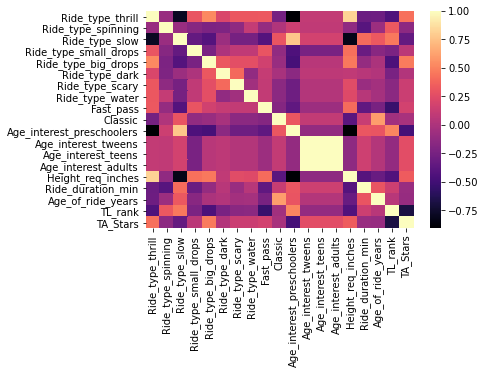

In [1196]:
sns.heatmap(df.corr(), cmap = 'magma', yticklabels = True);

In the heatmap above, we see some of the following:

**High Correlations**
* 1.0 (or visually equal) correlations for all the age interests, this is because so many of the rows are one value (Yes)
    * Although it may be wise to drop/remove these columns, I will keep them for now to see how they may affect machine learning models in the future, creating a separate dataset without these columns as an option to compare.
    * Our dataset is smaller, so we will want to keep them, as just 1"No" is 1/44, or ~ 2% of that category
* The next highest correlation is that of Ride_type_slow and age_interest_preschoolers
  * this suggests that preschoolers like slower rides (low-thrill)
* Next highest correlation is height requirements and thrill rides.
  * thrill rides often require higher height requirements, as they are not appropriate for small children for safety and enjoyment reasons

**Negative Correlations**
* negative correlation suggests inverse relationships
  * height requirements and ride_type slow: slower (low-thrill) rides have no or low height requirements
  * height requirements and interests of preschoolers are negative. preschoolers have shorter heights, therefore will only have interests in rides that have shorter height requirements, as that's the only ones they can go on!
  * the negative correlation between stars and rank is due to the fact that they ARE opposites
    * lower rank is the better outcome, where higher stars is better outcome; they are inversely proportional (expected)
  * thrill ride is negatively related to slow rides and preschoolers
    * slow rides are the opposite of thrill rides
    * preschoolers are too young to go on thrill rides

In [1197]:
#as promised, a subdataset which removes all remaining age_interest related columns, to be used later in models for comparison
no_ages_df = df.drop(columns= ['Age_interest_preschoolers', 'Age_interest_tweens', 'Age_interest_teens', 'Age_interest_adults'])
no_ages_df.head()

,Ride_name,Park_location,Park_area,Ride_type_all,Ride_type_thrill,Ride_type_spinning,Ride_type_slow,Ride_type_small_drops,Ride_type_big_drops,Ride_type_dark,Ride_type_scary,Ride_type_water,Fast_pass,Classic,Age_interest_all,Height_req_inches,Ride_duration_min,Age_of_ride_years,TL_rank,TA_Stars
0,Alien Swirling Saucers,HS,Toy Story Land,spinning,0,1,0,0,0,0,0,0,1,0,all ages,32,1.5,4.314168,31,4.0
1,Astro Orbiter,MK,Tomorrowland,"spinning, slow",0,1,1,0,0,0,0,0,0,1,all ages,0,1.5,27.657084,43,3.5
2,Avatar Flight of Passage,AK,Pandora,thrill,1,0,0,0,0,0,0,0,1,0,"kids, tweens, teens, adults",44,5.0,5.406571,9,5.0
3,Big Thunder Mountain Railroad,MK,Frontierland,"thrill, small drops",1,0,0,1,0,0,0,0,1,1,"kids, tweens, teens, adults",40,3.5,42.080082,8,4.5
4,Buzz Lightyear's Space Ranger Spin,MK,Tomorrowland,"spinning, slow",0,1,1,0,0,0,0,0,1,0,all ages,0,4.0,24.043121,32,4.5


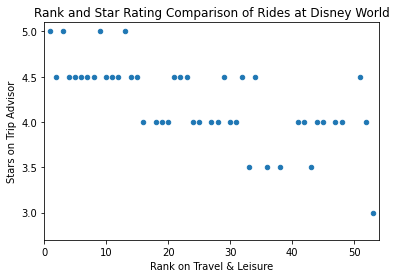

In [1198]:
#Visualization of this
df.plot.scatter(x='TL_rank', y = 'TA_Stars')
plt.xlim(0,54)
plt.xlabel('Rank on Travel & Leisure')
plt.ylabel('Stars on Trip Advisor')
plt.title('Rank and Star Rating Comparison of Rides at Disney World')
plt.ylim(2.7,5.1);
#As we can see, there is a negative trend, but the stars vary with rank, generally

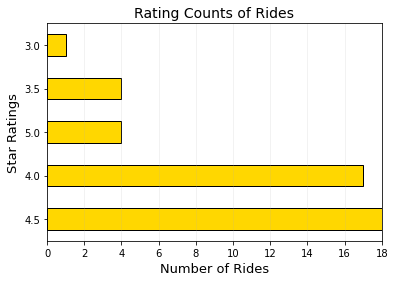

In [1205]:
#easier way to look at how many stars there are
df['TA_Stars'].value_counts().plot(kind = 'barh', edgecolor = 'black', color = 'gold')
plt.title('Rating Counts of Rides', fontsize = 14)
plt.ylabel('Star Ratings', fontsize = 13)
plt.xlabel('Number of Rides', fontsize = 13)
plt.xlim(0,18)
plt.grid(axis = 'x', alpha =0.2);

In [1200]:
#what rides have what stars
sv = df.groupby(['TA_Stars'])['Ride_name'].value_counts()
sv

TA_Stars  Ride_name                                     
3.0       Journey Into Imagination with Figment             1
3.5       Astro Orbiter                                     1
          Mission Space                                     1
          The Barnstormer                                   1
          Tomorrowland Speedway                             1
4.0       Alien Swirling Saucers                            1
          Dinosaur                                          1
          Frozen Ever After                                 1
          Gran Fiesta Tour Starring The Three Caballeros    1
          It's a Small World                                1
          Jungle Cruise                                     1
          Living with the Land                              1
          Mad Tea Party                                     1
          Na'vi River Journey                               1
          Peter Pan's Flight                                1
          Pri

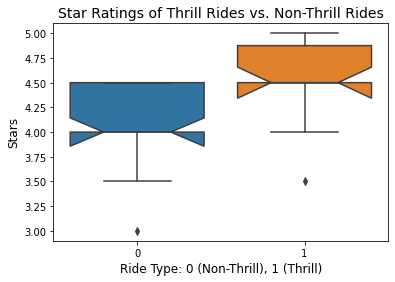

In [1201]:
sns.boxplot(x = 'Ride_type_thrill', y='TA_Stars', data = df, notch = True)
plt.title('Star Ratings of Thrill Rides vs. Non-Thrill Rides', fontsize=14)
plt.xlabel('Ride Type: 0 (Non-Thrill), 1 (Thrill)', fontsize = 12)
plt.ylabel('Stars', fontsize = 12);

In [1202]:
df.groupby(['Ride_type_thrill'])['TA_Stars'].describe()
#summary of boxplot in analog form

,count,mean,std,min,25%,50%,75%,max
Ride_type_thrill,,,,,,,,
0,30.0,4.1,0.380562,3.0,4.0,4.0,4.500,4.5
1,14.0,4.5,0.438529,3.5,4.5,4.5,4.875,5.0


Thrill rides are higher rated than non-thrill rides. (With one outlier in each category). The 25% and 50% are the same for both thrill and non-thrill rides. Non-thrill rides do not have a single 5.0 star attraction.